In [80]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
import numpy as np
import pandas as pd

# =========================
# Load data
# =========================
train_df = pd.read_csv("../../data/training_data.csv")
test_df  = pd.read_csv("../../data/test_data.csv")

# =========================
# Target & Features (REAL SCALE)
# =========================
TARGET = "Close_Price"
DROP_COLS = ["Date", "Close_Price_Normalized"]

X_train = train_df.drop(columns=DROP_COLS + [TARGET])
y_train = train_df[TARGET].values

X_test  = test_df.drop(columns=DROP_COLS + [TARGET])
y_test  = test_df[TARGET].values

# =========================
# Feature Engineering
# =========================
for df_ in [X_train, X_test]:
    df_["Price_Range"] = df_["High_Price"] - df_["Low_Price"]
    df_["Return_Volatility"] = df_["Daily_Return_Pct"] * df_["Volatility_Range"]
    df_["Volume_Impact"] = df_["Volume"] * df_["Daily_Return_Pct"]

# =========================
# Final Matrices
# =========================
print("Final input dimension:", X_train.shape[1])
print("Target stats:")
print(pd.Series(y_train).describe())


Final input dimension: 15
Target stats:
count    24000.000000
mean        43.052867
std         29.336937
min          1.000000
25%         18.760000
50%         38.495000
75%         63.570000
max        130.610000
dtype: float64


In [83]:
import numpy as np
import statsmodels.api as sm

# =========================
# Prepare data
# =========================
X_train_ols = sm.add_constant(X_train).astype(np.float64)
X_test_ols  = sm.add_constant(X_test).astype(np.float64)

y_train = y_train.astype(np.float64)
y_test  = y_test.astype(np.float64)

# =========================
# Train OLS (ONE constant)
# =========================
ols_model = sm.OLS(y_train, X_train_ols).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.918e+06
Date:                Mon, 02 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:08:56   Log-Likelihood:                -22322.
No. Observations:               24000   AIC:                         4.467e+04
Df Residuals:                   23985   BIC:                         4.479e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [84]:
import joblib

# =========================
# SAVE OLS ARTIFACTS (CRITICAL)
# =========================

# Save feature list INCLUDING constant order
ols_features = X_train_ols.columns.tolist()

joblib.dump(ols_model, "currentOlsSolution.pkl")
joblib.dump(ols_features, "ols_features.pkl")

print("Saved:")
print(" - currentOlsSolution.pkl")
print(" - ols_features.pkl")

print(ols_features)



Saved:
 - currentOlsSolution.pkl
 - ols_features.pkl
['const', 'Open_Price', 'High_Price', 'Low_Price', 'Volume', 'Daily_Return_Pct', 'Volatility_Range', 'VIX_Close', 'Economic_News_Flag', 'Sentiment_Score', 'Federal_Rate_Change_Flag', 'GeoPolitical_Risk_Score', 'Currency_Index', 'Price_Range', 'Return_Volatility', 'Volume_Impact']


In [85]:
# =========================
# Predictions & Metrics
# =========================

y_pred = ols_model.predict(X_test_ols)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"OLS RMSE: {rmse:.6f}")
print(f"OLS R²:   {r2:.6f}")


OLS RMSE: 0.611647
OLS R²:   0.999568


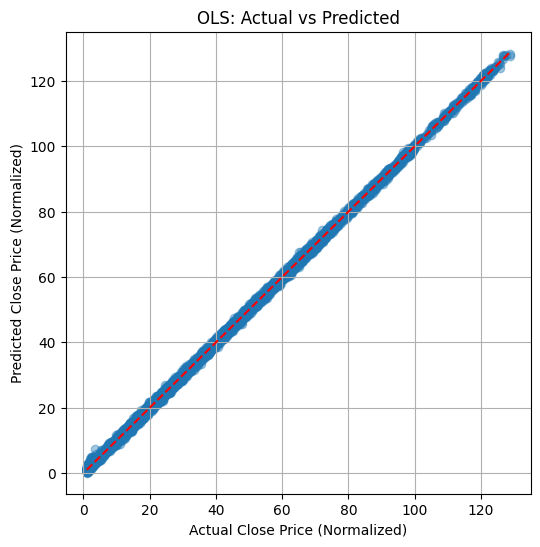

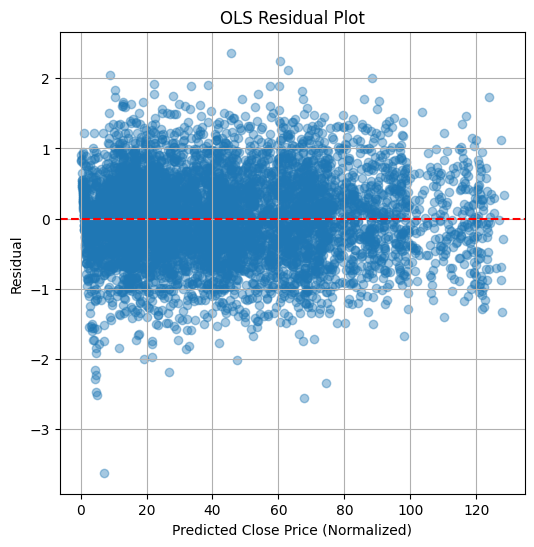

In [86]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Close Price (Normalized)")
plt.ylabel("Predicted Close Price (Normalized)")
plt.title("OLS: Actual vs Predicted")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Close Price (Normalized)")
plt.ylabel("Residual")
plt.title("OLS Residual Plot")
plt.grid(True)
plt.show()


In [88]:
print(train_df.columns)


Index(['Date', 'Open_Price', 'Close_Price', 'High_Price', 'Low_Price',
       'Volume', 'Daily_Return_Pct', 'Volatility_Range', 'VIX_Close',
       'Economic_News_Flag', 'Sentiment_Score', 'Federal_Rate_Change_Flag',
       'GeoPolitical_Risk_Score', 'Currency_Index', 'Close_Price_Normalized'],
      dtype='object')


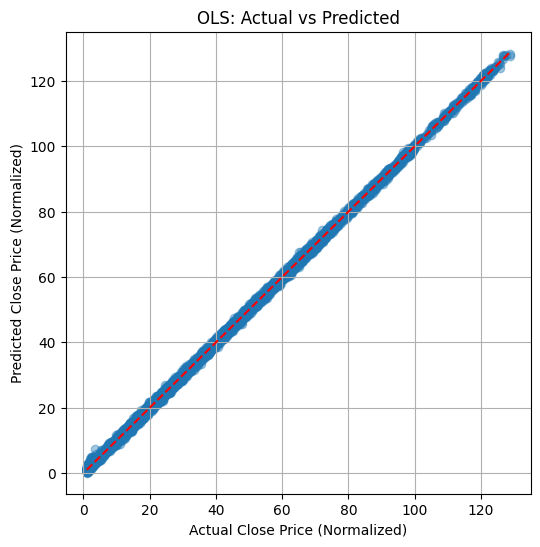

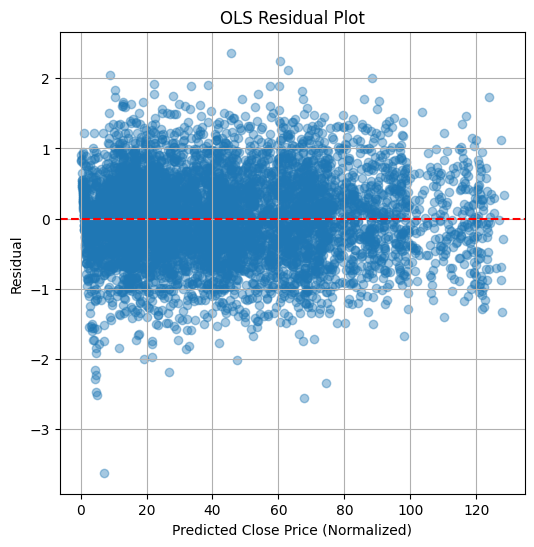

In [89]:
import os
import matplotlib.pyplot as plt

# =========================
# Output directory
# =========================
output_dir = "../../documentation/"
os.makedirs(output_dir, exist_ok=True)

# =========================
# Actual vs Predicted Plot
# =========================
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)
plt.xlabel("Actual Close Price (Normalized)")
plt.ylabel("Predicted Close Price (Normalized)")
plt.title("OLS: Actual vs Predicted")
plt.grid(True)

plt.savefig(
    os.path.join(output_dir, "ols_actual_vs_predicted.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# =========================
# Residual Plot
# =========================
residuals = y_test - y_pred

plt.figure(figsize=(6, 6))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Close Price (Normalized)")
plt.ylabel("Residual")
plt.title("OLS Residual Plot")
plt.grid(True)

plt.savefig(
    os.path.join(output_dir, "ols_residual_plot.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

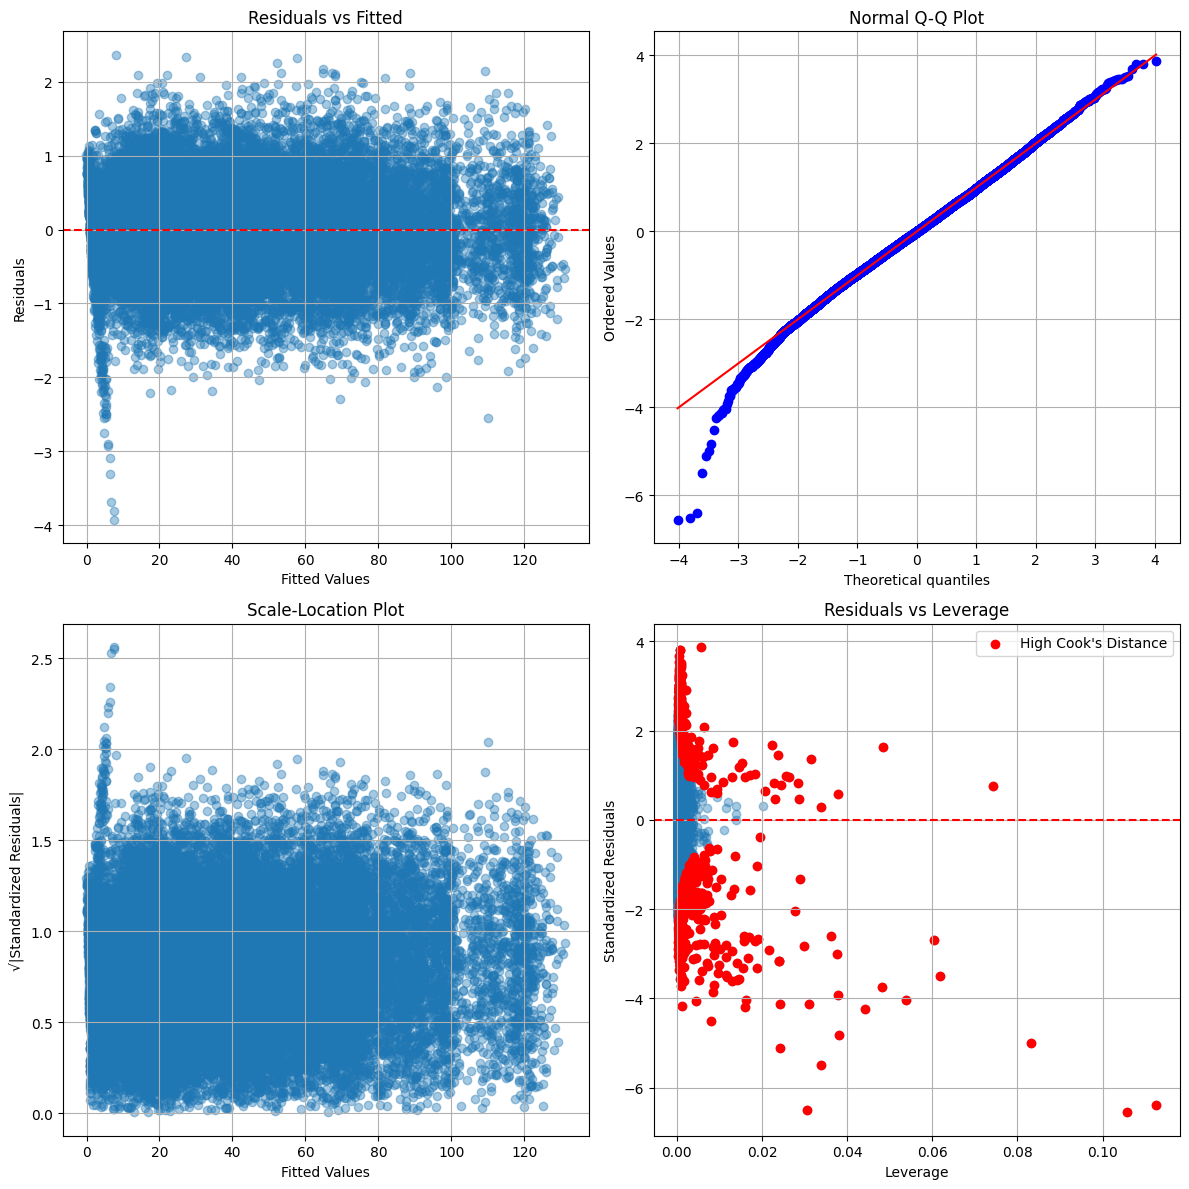

In [90]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# =========================
# Output directory
# =========================
output_dir = "../../documentation/"
os.makedirs(output_dir, exist_ok=True)

# =========================
# Diagnostics data
# =========================
fitted_vals = ols_model.fittedvalues
residuals = ols_model.resid

influence = ols_model.get_influence()
standardized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
cooks = influence.cooks_distance[0]

# =========================
# Create 2x2 diagnostic figure
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# ---- 1. Residuals vs Fitted ----
axes[0, 0].scatter(fitted_vals, residuals, alpha=0.4)
axes[0, 0].axhline(0, color="red", linestyle="--")
axes[0, 0].set_title("Residuals vs Fitted")
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].grid(True)

# ---- 2. Normal Q-Q Plot ----
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Normal Q-Q Plot")
axes[0, 1].grid(True)

# ---- 3. Scale-Location Plot ----
axes[1, 0].scatter(
    fitted_vals,
    np.sqrt(np.abs(standardized_residuals)),
    alpha=0.4
)
axes[1, 0].set_title("Scale-Location Plot")
axes[1, 0].set_xlabel("Fitted Values")
axes[1, 0].set_ylabel("√|Standardized Residuals|")
axes[1, 0].grid(True)

# ---- 4. Residuals vs Leverage ----
axes[1, 1].scatter(leverage, standardized_residuals, alpha=0.4)
axes[1, 1].axhline(0, color="red", linestyle="--")

cook_threshold = 4 / len(X_train_ols)
high_cook = cooks > cook_threshold

axes[1, 1].scatter(
    leverage[high_cook],
    standardized_residuals[high_cook],
    color="red",
    label="High Cook's Distance"
)

axes[1, 1].set_title("Residuals vs Leverage")
axes[1, 1].set_xlabel("Leverage")
axes[1, 1].set_ylabel("Standardized Residuals")
axes[1, 1].legend()
axes[1, 1].grid(True)

# =========================
# Save combined image
# =========================
plt.tight_layout()
plt.savefig(
    os.path.join(output_dir, "ols_diagnostic_plots_combined.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()